# Inicialização

Nesta etapa de inicialização é definida a função responsável por realizar o processo de reconhecimento de cada palavra em um tweet.

In [1]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string
import re

stop_word_list = stopwords.words('portuguese') \
                    + list(string.punctuation) \
                    + ['rt', 'via', '...', 'é', '…', 'pra', 'q', 'n', 'c', 'aí', 'ai', 'ein', 'p', 'vc', 'ta', 'tá', 'vou', 'to', 'tô', '@mention']


def process(text, tokenizer=TweetTokenizer(), stopwords=stop_word_list):
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit()]


def esconder_mention(tweet):
    """
    Função implementada para esconder qualquer mention nos tweets por questões de privacidade.
    A mention @iFood será preservada.
    
    :param
        tweet: texto do tweet para ser analisado
    
    :return
        tweet com qualquer mention "@user_name" substituída por "@mention"
    """
    return re.sub('\@(?!ifood)\w*', '@mention', tweet, flags=re.IGNORECASE)

# Base de dados
A base de dados não está disponível para download neste _repository_ por questões de privacidade. Contudo, os dados são carregados nesta etapa.

In [2]:
import pandas as pd

df = pd.read_csv('data.csv', parse_dates=['created_at'])
print(f'Quantidade de registros válidos: {len(df)}')

Quantidade de registros válidos: 9688


## Esconder @mention
Nesta etapa vamos modificar nossa base de dados e remover todas as mentions referentes aos usuários. É importante destacar que as mentions referente ao @iFood serão mantidas.

In [3]:
df['text'] = df['text'].apply(esconder_mention)

## Ajuste do Fuso Horário
Os dados coletados do Twitter possuem a coluna __'created_at'__ com o fuso horário ajustado para GMT 00:00. Portanto, nesta etapa o ajuste é feito para o horário de Brasília, com GMT -3.

In [4]:
from datetime import timedelta

df['created_at'] = df['created_at'].apply(lambda data : data - timedelta(hours=3))

# Frequência de palavras
Etapa responsável por exibir as palavras mais utilizadas nos tweets.<br>
_É neste momento que iremos utilizar a função definida na primeira etapa._

Observe que a variável __total_freq__ representa o total de palavras mais frequentes. No nosso caso, podemos analisar as 50 palavras mais utilizadas.

Algumas palavras merecem destaques: 
* cupom
* reclamação
* manda
* desconto
* uber

Com apenas 5 palavras listadas já podemos definir uma rota para extrair valores desta análise. Podemos levantar alguns questionamentos como:
* Usuários estão solicitando cupons?
* Há algum problema entre a plataforma iFood e os usuários que os levam à reclamação?
* Mais uma vez, usuários estão pedindo para "mandar desconto"?
* Por fim, não menos importante, em relação à última palavra, o quanto a plataforma iFood deve atentar-se? rs

In [5]:
from collections import Counter

total_freq = 50

words = Counter()
df['text'].apply(lambda frase : words.update(process(text=frase)))
words.most_common(total_freq)

[('ifood', 6433),
 ('@ifood', 3008),
 ('cupom', 2196),
 ('pedir', 717),
 ('pedi', 699),
 ('lanche', 624),
 ('pedido', 532),
 ('desconto', 471),
 ('aqui', 434),
 ('queria', 403),
 ('manda', 380),
 ('pq', 374),
 ('dia', 354),
 ('sim', 342),
 ('comida', 340),
 ('hoje', 320),
 ('comer', 311),
 ('reais', 301),
 ('quero', 298),
 ('agora', 292),
 ('casa', 289),
 ('https://t.co/db2etbjwqs', 289),
 ('boa', 288),
 ('entrega', 283),
 ('fome', 277),
 ('nada', 271),
 ('chegar', 264),
 ('veio', 256),
 ('vai', 256),
 ('uber', 235),
 ('pizza', 234),
 ('tarde', 231),
 ('nao', 213),
 ('ter', 207),
 ('fiz', 204),
 ('gostaria', 203),
 ('faze', 201),
 ('nunca', 201),
 ('endivido', 200),
 ('reclamasao', 198),
 ('https://t.co/ddrgjgr8bb', 198),
 ('rappi', 193),
 ('todo', 188),
 ('cupons', 188),
 ('dinheiro', 179),
 ('alguém', 175),
 ('ver', 174),
 ('noite', 174),
 ('dá', 170),
 ('entregador', 169)]

# Visualização das palavras mais frequentes

<BarContainer object of 50 artists>

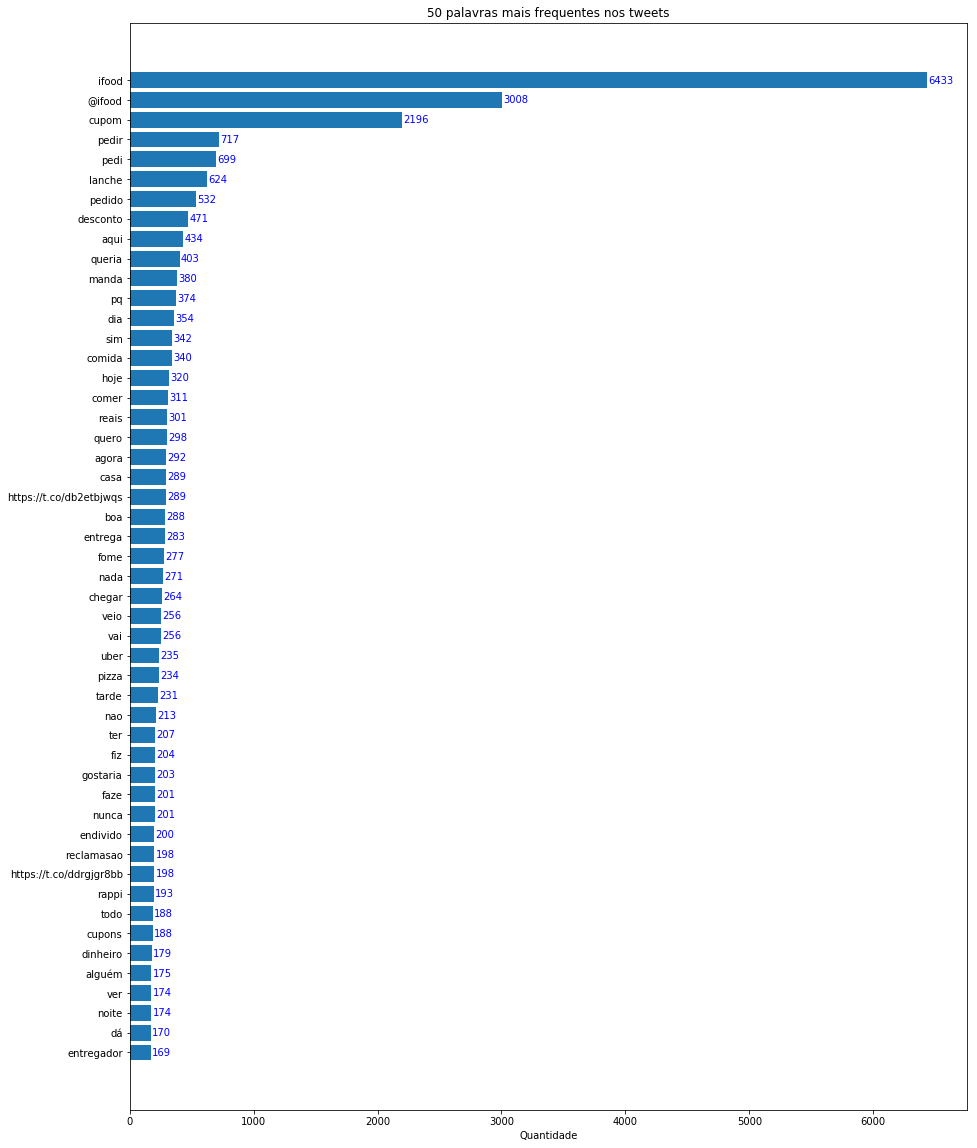

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 20))

x = range(total_freq)
y = [count for tag, count in words.most_common(total_freq)]

# Rótulos no eixo Y: palavras frequentes
plt.yticks(x, [tag for tag, count in words.most_common(total_freq)])

# Labels em cada Bar
for position, value in enumerate(y):
    ax.text(value + 10, position + .15, str(value), color='blue')

plt.title(f'{total_freq} palavras mais frequentes nos tweets')
ax.set_xlabel('Quantidade')

plt.gca().invert_yaxis()
ax.barh(x, y)

# O que os usuários estão tweetando?
Vamos entender qual o contexto em que as palavras mais frequentes foram utilizadas.

In [8]:
def extrair_contexto(palavra, qtd_retorno=10):
    """
    :param
        palavra: string que será pesquisada no tweet
        qtd_retorno: define quantos tweets são retornados
        
    :return
        Retorna os tweets que contém a palavra especificada no parâmetro da função. 
        Com este retorno é possível selecionar quais colunas serão exibidas para o usuário.
    """
    return df[df['text'].str.contains(palavra)].head(qtd_retorno)

## 'Cupom'
Libera o cupom @iFood haha

__Que tal criar um canal para "Solicitar Cupom"?__ Ou algo mais tradicional como um "Programa Fidelidade" ou "Programa de Recompensas"?

In [9]:
extrair_contexto('cupom', qtd_retorno=20)[['text', 'created_at']].values

array([['botando expectativas que irei receber um cupom do ifood pra me salvar porém nem tanto',
        Timestamp('2019-04-21 17:59:59+0000', tz='UTC')],
       ['@iFood me da um cupom pra janta por favor, obrigado pelos mimos',
        Timestamp('2019-04-21 17:56:18+0000', tz='UTC')],
       ['preciso de um cupom do ifood :(',
        Timestamp('2019-04-21 17:55:28+0000', tz='UTC')],
       ['@mention Hoje tem cupom iFood?',
        Timestamp('2019-04-21 17:45:00+0000', tz='UTC')],
       ['hj q quero meu cupom no ifood ele n chega logo que odio',
        Timestamp('2019-04-21 17:41:06+0000', tz='UTC')],
       ['@mention ai o Ifood é maravilhoso eu ganhei até um cupom de desconto to feliz',
        Timestamp('2019-04-21 17:36:28+0000', tz='UTC')],
       ['@iFood solta um cupom, ajuda minha vida',
        Timestamp('2019-04-21 17:18:31+0000', tz='UTC')],
       ['Queria um cupom do ifood, pqp',
        Timestamp('2019-04-21 17:17:27+0000', tz='UTC')],
       ['na hora de encher as n

## 'Reclamação' x 'Reclamasao'

### Reclamação
@iFood, como estão de reclamações?

In [10]:
extrair_contexto('reclamação')['text'].values

array(['parabéns pro @ifood que não tem nem uma sessão de reclamação decente.\r\n\r\no restaurante não fez a entrega, fechou as 1… https://t.co/2J6VMhozLJ',
       'Tive um problema com uma entrega do ifood e postei reclamação tem uns 30min e me ligaram AGORA do ifood msm pra ped… https://t.co/2Q0t6F9L45',
       '@mention @mention @mention @mention @mention @iFood Ifood eu super concordo, tenho uma reclamação há 1 semana sem nem resposta',
       '@mention Liga pro restaurante e faz reclamação no ifood. Pq se vc deixar cancelarem não vai ter seu dinheiro de… https://t.co/G8mI9sXwW9',
       '@iFood Boa noite, qual o e-mail de vocês? Tentei mandar uma reclamação no e-mail que achei no Google mas deu inválido.',
       '@iFood preciso fazer uma reclamação, como faço??',
       'Uma das coisas que eu mais me caguei de rir recentemente foi o print da reclamação no iFood da pessoa dizendo que p… https://t.co/0s1n4SBIo0',
       'to só minha mãe indignada mandando reclamação pro iFood pq o 

### Reclamasao

In [11]:
extrair_contexto('reclamasao')['text'].values

array(['RT @mention: boa tarde pedi lanche do @iFood e veio com este endivido gostaria de faze reclamasao https://t.co/DdrgJgR8bB',
       'RT @mention: boa tarde pedi lanche do @iFood e veio com este endivido gostaria de faze reclamasao https://t.co/DdrgJgR8bB',
       'RT @mention: boa tarde pedi lanche do @iFood e veio com este endivido gostaria de faze reclamasao https://t.co/DdrgJgR8bB',
       'RT @mention: boa tarde pedi lanche do @iFood e veio com este endivido gostaria de faze reclamasao https://t.co/DdrgJgR8bB',
       'RT @mention: boa tarde pedi lanche do @iFood e veio com este endivido gostaria de faze reclamasao https://t.co/DdrgJgR8bB',
       'RT @mention: boa tarde pedi lanche do @iFood e veio com este endivido gostaria de faze reclamasao https://t.co/DdrgJgR8bB',
       'RT @mention: boa tarde pedi lanche do @iFood e veio com este endivido gostaria de faze reclamasao https://t.co/DdrgJgR8bB',
       'RT @mention: boa tarde pedi lanche do @iFood e veio com este endivid

## 'Uber'
_"propagandas mais insuportáveis do youtube"_. 

__Que tal lançar uma campanha de propagandas com os próprios usuários?__

In [12]:
extrair_contexto('uber', qtd_retorno=20)['text'].values

array(['@mention @iFood Mano esquece esses cornos e migra pro uber eats, tá dando desconto direto e tem restaurantes/lanchonetes bons',
       'RT @mention: ifood, rappi e uber eats sabendo que são as propagandas mais insuportáveis do youtube  https://t.co/nsjyloPnmk',
       'RT @mention: ifood, rappi e uber eats sabendo que são as propagandas mais insuportáveis do youtube  https://t.co/nsjyloPnmk',
       'n e possível que todo mundo ganha cupom no ifood/uber eats menos eu',
       'RT @mention: ifood, rappi e uber eats sabendo que são as propagandas mais insuportáveis do youtube  https://t.co/nsjyloPnmk',
       'RT @mention: ifood, rappi e uber eats sabendo que são as propagandas mais insuportáveis do youtube  https://t.co/nsjyloPnmk',
       'RT @mention: ifood, rappi e uber eats sabendo que são as propagandas mais insuportáveis do youtube  https://t.co/nsjyloPnmk',
       'Todo dia uber eats e/ou ifood me mandando cupom de desconto, querem me ver pobre e gorda só pode',
       'R

# Series time

Nesta etapa podemos extrair outros comportamentos dos usuários. Vamos analisar os horários em que os usuários mais postam, e ainda, analisar mais de perto o que está acontecendo nestes momentos de picos.

In [13]:
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

from pytz import UTC
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


def analisar_periodo(date_min, date_max, interval_minutes=10, qtd_retorno=10):
    """
    Função responsável por construir o gráfico com um período inicial e final de data e hora definidos nos parâmetros da função.

    :param
        date_min: data inicial com horas
        date_max: data final com horas
        (exemplo: datetime(2019, 5, 24, 10, 30, tzinfo=UTC) equivale a dia 24/maio/2019 10 horas e 30 minutos)

        interval_minutes: frequencia do intervalo no eixo X do gráfico para análise 
        qtd_retorno: define quantos tweets são retornados como texto

    :return
        Texto dos tweets nos horários com a maior frequência de tweets
        Plotagem do gráfico
    """
    # Estrutura para construção do gráfico
    df_periodo = df[(df['created_at'] > date_min) & (df['created_at'] < date_max)]
    # print(f'Quantidade de tweets na base de dados entre {date_min.strftime("%d-%B-%Y %H:%M")} a {date_max.strftime("%d-%B-%Y %H:%M")}:\n{len(df_periodo)}') 
    
    all_dates = df_periodo['created_at'] 
    idx = pd.DatetimeIndex(all_dates)
    ones = np.ones(len(all_dates))
    dados_series = pd.Series(ones, index=idx)

    dados_agrupados = dados_series.resample(f'{interval_minutes}Min').sum().fillna(0) 

    # Gráfico
    fig, ax, = plt.subplots(figsize=(15, 7))
    ax.grid(True)
    ax.set_title(f'Frequência de tweets: {date_min.strftime("%d-%B-%Y %H:%M")} a {date_max.strftime("%d-%B-%Y %H:%M")} ')

    hours = mdates.MinuteLocator(interval=interval_minutes)
    ax.xaxis.set_major_locator(hours)
    
    date_formatter = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(date_formatter)
    
    ax.set_xlim(date_min, date_max)
    ax.plot(dados_agrupados.index, dados_agrupados)
    
    # Rotacionar texto no eixo X
    fig.autofmt_xdate()

    # Retorna os textos dos tweets 
    tweets = df_periodo[df_periodo['created_at'] > dados_agrupados.idxmax()].sort_values(by='created_at')['text'].head(qtd_retorno).values
    
    return tweets, plt

### Feriado Carnaval: 05 de março de 2019, período 17h às 23h

['faz duas horas que eu fiz um pedido no ifood e até agora não chegou'
 'Ifood tá de gozação com a minha cara'
 'RT @mention: SE EU VER MAIS UMA PROPAGANDA DE IFOOD NO YOUTUBE EU VOU SURTAR https://t.co/2jSBJMnBu1'
 '@mention @mention é sempre ifood ou uber e eles NAO TROCAM A PROPAGANDA é sempre a mesma pqp peguei raiva'
 'RT @mention: faz duas horas que eu fiz um pedido no ifood e até agora não chegou'
 'vai tomar no cu ifood fala q vc tem cupom e quando vai aplicar ta invalido'
 'RT @mention: SE EU VER MAIS UMA PROPAGANDA DE IFOOD NO YOUTUBE EU VOU SURTAR https://t.co/2jSBJMnBu1'
 'RT @mention: Eu querendo cupom do ifood https://t.co/Z9QEWWxsMA'
 '@mention @mention @mention @iFood Não concordo'
 'ir de ifood que é o melhor investimento']


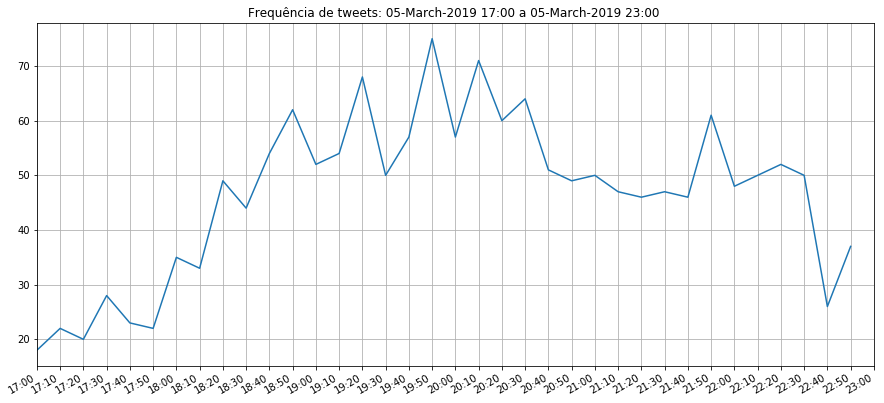

In [14]:
date_min = datetime(2019, 3, 5, 17, 0, tzinfo=UTC)
date_max = datetime(2019, 3, 5, 23, 0, tzinfo=UTC)

tweets, plt = analisar_periodo(date_min, date_max)
print(tweets)

### Feriado Tiradentes: 21 de abril de 2019, período 17h às 23h

['ifood, rappi e uber eats sabendo que nunca vão chegar na minha região https://t.co/ggHHfS1vRl'
 'obgd senhor, ifood fez tanta propaganda no meio do vídeo q vou ter que fazer um pão quase 11, sendo q já tava pronto pra dormir'
 '@mention Tava assim c arroz e feijão!\r\nAchei no ifood um lugar q me vendeu 1 marmita de arroz, 1 de salada e 1 de feijão e foi só sucesso'
 'eu aceito suas desculpas por ser homem ☺️ agr manda um ifood pra cá'
 'RT @iFood: Leite de giganta não é entregue'
 'RT @iFood: Leite de giganta não é entregue'
 'RT @iFood: Leite de giganta não é entregue'
 'RT @iFood: Leite de giganta não é entregue'
 'Vsf https://t.co/lYK7BmW1KJ'
 'RT @iFood: Leite de giganta não é entregue']


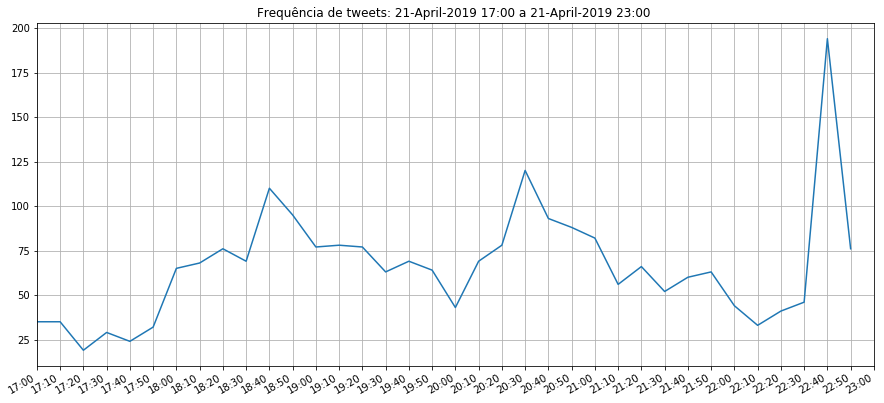

In [15]:
date_min = datetime(2019, 4, 21, 17, 0, tzinfo=UTC)
date_max = datetime(2019, 4, 21, 23, 0, tzinfo=UTC)

tweets, plt = analisar_periodo(date_min, date_max)
print(tweets)

### Feriado Dia do Trabalhador: 1 de maio de 2019, período 17h às 23h

['jesus vou morrer de fome ate esse ifood chega'
 'Ja sou velha, prefiro pedir por telefone que pelo ifood'
 '@mention SIM e ainda tive q pedir ifood pra almoçar e nem o habibs tava aberto foi triste'
 '@mention @iFood Porra. KD o meu?'
 'dois minutos depois que confirmo o pedido o ifood vai la e manda um cupom de desconto https://t.co/zrci5ffje6'
 'eu: \r\napp do ifood: toma esse cupom'
 'cancelando o ifood que eu acabei de pedir https://t.co/bbgjT6fxBT'
 'ifood n libera um cupom'
 'Pra hoje eu só queria um cupom de desconto do ifood ou que alguém fosse na praça buscar um podrãozinho pra mim'
 'Fecho o pedido no @iFood. Três minutos DEPOIS recebo cupom de desconto que só vale pra hoje.\r\n\r\nMaravilha, hein?!']


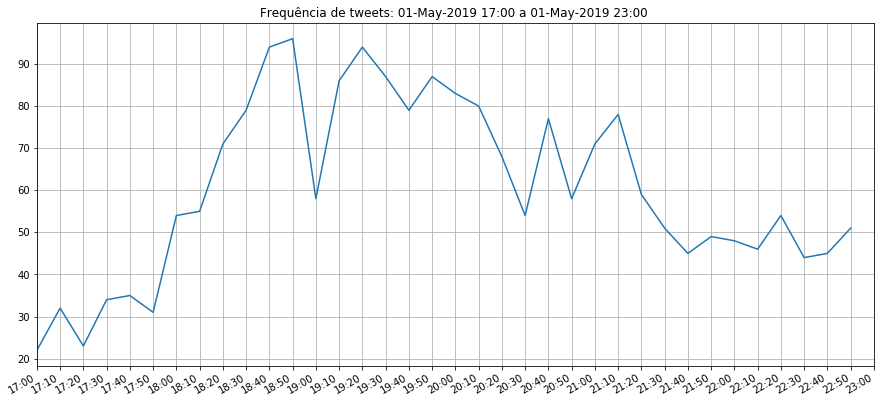

In [16]:
date_min = datetime(2019, 5, 1, 17, 0, tzinfo=UTC)
date_max = datetime(2019, 5, 1, 23, 0, tzinfo=UTC)

tweets, plt = analisar_periodo(date_min, date_max)
print(tweets)

### Feriado Dia das Mães: 12 de maio de 2019, período 17h às 23h

['RT @mention: o funcionário do ifood tentando encaixar uma frase engraçadinha pra palavra cupom virar cu na notificação https://t.co/iuOl…'
 'Só faltou o ifood me manda um cuponzinho pra eu pedir um lanche'
 'RT @mention: AGORA É COMER MEU BURGER QUE COMPREI COM O CUPOM DO IFOOD E ME PREPARAR PRA VER #GOT https://t.co/izaEjL51bx'
 'RT @mention: AGORA É COMER MEU BURGER QUE COMPREI COM O CUPOM DO IFOOD E ME PREPARAR PRA VER #GOT https://t.co/izaEjL51bx'
 'Ifood porque me fodeste'
 'RT @mention: AGORA É COMER MEU BURGER QUE COMPREI COM O CUPOM DO IFOOD E ME PREPARAR PRA VER #GOT https://t.co/izaEjL51bx'
 'iFood é um vício socorroo'
 'RT @mention: aí sim ein ifood https://t.co/dB2EtBjwqs'
 'iFood deve tá de palhaçada cmg certeza'
 'Esse negócio do iFood de ter um preço mínimo pra entrega é um cu'
 'RT @mention: AGORA É COMER MEU BURGER QUE COMPREI COM O CUPOM DO IFOOD E ME PREPARAR PRA VER #GOT https://t.co/izaEjL51bx'
 '@iFood O serviço está uma droga, meu pedido está atrasado em 1 hora

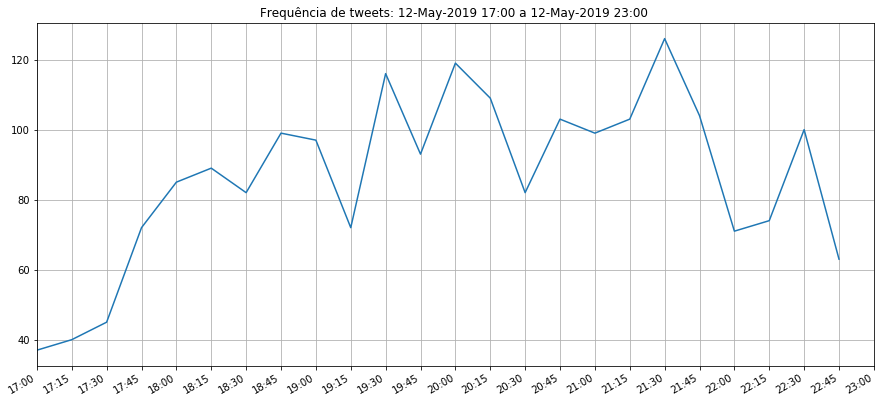

In [17]:
date_min = datetime(2019, 5, 12, 17, 0, tzinfo=UTC)
date_max = datetime(2019, 5, 12, 23, 0, tzinfo=UTC)

tweets, plt = analisar_periodo(date_min, date_max, interval_minutes=15, qtd_retorno=15)
print(tweets)